# BoolForge Tutorial #3: Canalization

In this tutorial, we will focus on canalization, a key property of Boolean functions, specifically those that constitute biologically meaningful update rules in biological networks. 
You will learn how to:
- determine if a Boolean function is canalizing, k-canalizing and nested canalizing,
- compute the canalizing layer structure of any Boolean function, and
- compute properties related to collective canalization, such as the canalizing strength or the effective degree and input redundancy.

In [43]:
import boolforge
import numpy as np
import matplotlib.pyplot as plt

## Canalizing variables and layers

A Boolean function $f(x_1, \ldots, x_n)$ is *canalizing* if there exists at least one *canalizing variable* $x_i$ and a *canalizing input value* $a \in \{0, 1\}$ such that $f(x_1, \ldots,x_i = a, \ldots, x_n)=b$, where $b\in\{0,1\}$ is a constant, the *canalized output*.

A Boolean function is *k-canalizing* if it has at least k conditionally canalizing variables. This is checked recursively: after fixing a canalizing variable $x_i$ to its non-canalizing input value $\bar a$, the subfunction $f(x_1,\ldots,x_{i-1},x_{i+1},\ldots,x_n)$ must itself contain another canalizing variable, and so on. For a given function, the maximal possible value of k is defined as its *canalizing depth*. If all variables are conditionally canalizing (i.e., if the canalizing depth is $n$), the function is called a *nested canalizing* function (*NCF*). Biological networks are heavily enriched for NCFs as we explore in a later tutorial.

Per (He and Macauley, Physica D, 2016), any Boolean function can be decomposed into a unique standard monomial form by recursively identifying and removing all conditionally canalizing variables (this set of variables is called a *canalizing layer*). Each variable of a Boolean function appears in exactly one layer, or (if it is not conditionally canalizing) it is part of the non-canalizing core function that has to be evaluated only if all conditionally canalizing variables receive their non-canalizing input value. The *canalizing layer structure* $[k_1,\ldots,k_r]$ describes the number of variables in each canalizing layer. We thus have $r\geq 0$, $k_i\geq 1$ and $k_1+\cdots+k_r$.

In the following code, we define four 3-input functions with different canalizing properties.

In [54]:
# Example: a non-canalizing XOR function.
f = boolforge.BooleanFunction('(x0 + x1 + x2) % 2')

# Example: a 1-canalizing function
g = boolforge.BooleanFunction('(x0 | (x1 & x2 | ~x1 & ~x2)) % 2')

# Example: an NCF with 3 canalizing variables in the outer layer
h = boolforge.BooleanFunction('~x0 & x1 & x2')

# Example: an NCF with 1 canalizing variable in the outer layer and two in the inner layer
k = boolforge.BooleanFunction('x0 | (x1 & x2)')

labels = ['f','g','h','k']

boolforge.display_truth_table(f,g,h,k,labels=labels)

x0	x1	x2	|	f	g	h	k
---------------------------------------------------------
0	0	0	|	0	1	0	0
0	0	1	|	1	0	0	0
0	1	0	|	1	0	0	0
0	1	1	|	0	1	1	1
1	0	0	|	1	1	0	1
1	0	1	|	0	1	0	1
1	1	0	|	0	1	0	1
1	1	1	|	1	1	0	1


For each function, we can determine whether it is canalizing and/or nested canalizing. This is determined by the canalizing depth (the number of conditionally canalizing variables), which we can also directly compute. As a reminder, an n-input function is canalizing if its canalizing depth is non-zero and nested canalizing if its canalizing depth equals n.

In [32]:
for func,label in zip([f,g,h,k],labels):
    canalizing_depth = func.get_canalizing_depth()
    print(f'Canalizing depth of {label}: {canalizing_depth}')     
    
    CANALIZING = func.is_canalizing()
    print(f'{label} is canalizing: {CANALIZING}')

    NESTED_CANALIZING = func.is_k_canalizing(k=func.n)
    print(f'{label} is nested canalizing: {NESTED_CANALIZING}')

    print()  

Canalizing depth of f: 0
f is canalizing: False
f is nested canalizing: False

Canalizing depth of g: 1
g is canalizing: True
g is nested canalizing: False

Canalizing depth of h: 3
h is canalizing: True
h is nested canalizing: True

Canalizing depth of k: 3
k is canalizing: True
k is nested canalizing: True



We can also compute the entire canalizing layer structure, which yields information on the canalizing input values, the canalized output values, the order of the canalizing variables, the layer structure and the core function.

In [33]:
for func,label in zip([f,g,h,k],labels):
    canalizing_info = func.get_layer_structure()
    print(f'Canalizing input values of {label}: {canalizing_info['CanalizingInputs']}')
    print(f'Canalized output values of {label}: {canalizing_info['CanalizedOutputs']}')
    print(f'Order of canalizing variables of {label}: {canalizing_info['OrderOfCanalizingVariables']}')
    print(f'Layer structure of {label}: {canalizing_info['LayerStructure']}')
    print(f'Number of canalizing layers of {label}: {canalizing_info['NumberOfLayers']}')
    print(f'Non-canalizing core function of {label}: {canalizing_info['CoreFunction']}')
    print()

Canalizing input values of f: []
Canalized output values of f: []
Order of canalizing variables of f: []
Layer structure of f: []
Number of canalizing layers of f: 0
Non-canalizing core function of f: [0 1 1 0 1 0 0 1]

Canalizing input values of g: [1]
Canalized output values of g: [1]
Order of canalizing variables of g: [0]
Layer structure of g: [1]
Number of canalizing layers of g: 1
Non-canalizing core function of g: [1 0 0 1]

Canalizing input values of h: [1 0 0]
Canalized output values of h: [0 0 0]
Order of canalizing variables of h: [0 1 2]
Layer structure of h: [3]
Number of canalizing layers of h: 1
Non-canalizing core function of h: [1]

Canalizing input values of k: [1 0 0]
Canalized output values of k: [1 0 0]
Order of canalizing variables of k: [0 1 2]
Layer structure of k: [1, 2]
Number of canalizing layers of k: 2
Non-canalizing core function of k: [1]



Consider, for example, the output for `h`. The canalizing input variables corresponding to the canalizing variables $x_0, x_1, x_2$ are $1,0,0$, respectively. Likewise, the corresponding canalized output values are all 0. This tells us that `h` can be evaluated as follows:
$$h(x_0,x_1,x_2) = 
\begin{cases}
0 & \ \text{if}\ x_0 = 1,\\
0 & \ \text{if}\ x_0 \neq 1 \ \text{and} \ x_1 = 0,\\
0 & \ \text{if}\ x_0 \neq 1 \ \text{and} \ x_1 \neq 0 \ \text{and} \ x_2 = 0,\\
1 & \ \text{if}\ x_0 \neq 1 \ \text{and} \ x_1 \neq 0 \ \text{and} \ x_2 \neq 0.\end{cases}
$$
Since $x_1$ and $x_2$ are both part of the second canalizing layer, `h` can equivalently be evaluated as:
$$h(x_0,x_1,x_2) = 
\begin{cases}
0 & \ \text{if}\ x_0 = 1,\\
0 & \ \text{if}\ x_0 \neq 1 \ \text{and} \ x_2 = 0,\\
0 & \ \text{if}\ x_0 \neq 1 \ \text{and} \ x_2 \neq 0 \ \text{and} \ x_1 = 0,\\
1 & \ \text{if}\ x_0 \neq 1 \ \text{and} \ x_2 \neq 0 \ \text{and} \ x_1 \neq 0.\end{cases}
$$

## Collective canalization

More recently, the idea of collective canalization was introduced (Reichhardt & Bassler, Journal of Physics A, 2007). Rather than defining canalization as a property of each individual variable of a Boolean function, it is considered as a property of the function itself. Extending the basic definition of canalization, a Boolean n-input function is *k-set canalizing* if there exists a set of k variables such that setting these variables to specific values forces the output of the function, irrespective of the other n - k inputs (Kadelka et al, Advances in Applied Mathematics, 2023). Naturally, 
- any Boolean function is n-set canalizing,
- the only two Boolean functions that are not $n-1$-set canalizing are the parity / XOR functions, and
- the 1-set canalizing functions are exactly the canalizing functions.

For any function and a given k, we can quantify the proportion of k-sets that collectively canalize this function (i.e., suffice to determine its output). This is called the *k-set canalizing proportion* $P_k(f)$.
It is fairly obvious that
- nested canalizing functions of a single layer such as `h` are the non-degenerate functions with highest k-set canalizing proportion $P_k(f) = 1-1/2^k$, and
- $P_{k-1}(f) \leq P_k(f)$, i.e., more knowledge about a function's inputs cannot result in less knowledge about its output,
- the $n-1$-set canalizing proportion $P_{n-1}(f)$ is 1 minus the function's normalized average sensitivity.

We can compute the k-set canalizing proportions for the four 3-input functions:

In [40]:
for func,label in zip([f,g,h,k],labels):
    print(f'1-set canalizing proportions of {label}: {func.get_kset_canalizing_proportion(k=1)}')
    print(f'2-set canalizing proportions of {label}: {func.get_kset_canalizing_proportion(k=2)}')
    print(f'Normalized average sensitivity of {label}: {func.get_average_sensitivity(EXACT=True)}')
    print(f'3-set canalizing proportions of {label}: {func.get_kset_canalizing_proportion(k=3)}')
    print()

1-set canalizing proportions of f: 0.0
2-set canalizing proportions of f: 0.0
Normalized average sensitivity of f: 1.0
3-set canalizing proportions of f: 1.0

1-set canalizing proportions of g: 0.16666666666666666
2-set canalizing proportions of g: 0.5
Normalized average sensitivity of g: 0.5
3-set canalizing proportions of g: 1.0

1-set canalizing proportions of h: 0.5
2-set canalizing proportions of h: 0.75
Normalized average sensitivity of h: 0.25
3-set canalizing proportions of h: 1.0

1-set canalizing proportions of k: 0.16666666666666666
2-set canalizing proportions of k: 0.5833333333333334
Normalized average sensitivity of k: 0.4166666666666667
3-set canalizing proportions of k: 1.0



The *canalizing strength* is a measure to quantify the degree of canalization of any Boolean function (Kadelka et al, Advances in Applied Mathematics, 2023). It is computed as a weighted average of the k-set canalizing proportions. It is 1 for the most canalizing non-degenerate functions (namely, nested canalizing functions of a single canalizing layer such as `h`) and 0 for the least canalizing functions (namely, parity / XOR functions such as `f`). For all other non-degenerate Boolean functions it is within $(0,1)$.

It helps to consider the canalizing strength as a probability: Given that I know a random number of function inputs (drawn uniformly at random from $1,\ldots,n-1$), how likely am I to already know the function output?

In [41]:
for func,label in zip([f,g,h,k],labels):
    canalizing_strength  = func.get_canalizing_strength()
    print(f'Canalizing strength of {label}: {canalizing_strength}')
    print()

Canalizing strength of f: 0.0

Canalizing strength of g: 0.5

Canalizing strength of h: 1.0

Canalizing strength of k: 0.5555555555555556



An enumeration of all non-degenerate 3-input Boolean functions reveals the distribution of the canalizing strength. Note that this brute-force code can also run (in less than a minute) for all $2^{2^4}=2^{16}=65,536$ 4-input functions but will take days for all $2^{2^5}=2^{32}=4,294,967,296$ 5-input functions.

Text(0, 0.5, 'Count')

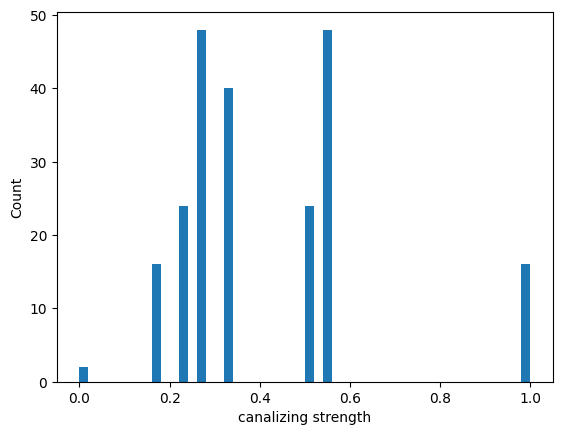

In [52]:
n = 3
all_functions  = boolforge.get_left_side_of_truth_table(2**n)

canalizing_strengths = []
for binary_vector in all_functions:
    func = boolforge.BooleanFunction(f = binary_vector)
    if func.is_degenerate() == False:
        canalizing_strength  = func.get_canalizing_strength()
        canalizing_strengths.append(canalizing_strength)

fig,ax = plt.subplots()
ax.hist(canalizing_strengths,bins=50)
ax.set_xlabel('canalizing strength')
ax.set_ylabel('Count')

## Canalization as a measure of input redundancy

Canalization, symmetry and redundancy are related concepts. A highly symmetry Boolean function with few (e.g., one) symmetry group exhibits high input redundancy and is on average more canalizing, irrespective of the measure of canalization. Recently, it was shown that almost all Boolean functions (except the parity / XOR functions) exhibit some level of *input redundancy* (Gates et al., PNAS, 2021). The input redundancy of a variable is defined as 1 minus its *edge effectiveness*, which describes the proportion of times that this variable is needed to determine the output of the function. Edge effectiveness is very similar to the activity of a variable but is not the same (the difference is defined as *excess canalization*). The sum of all edge effectivenesses of the inputs of a function is known as its *effective degree*. The average input redundancy serves as a measure of the canalization in a function.

In `BoolForge`, all these quantities can be computed, however not directly. Instead, they are computed from the `CANA` package, which uses simulation and needs to be installed (`pip install cana`) to enjoy this functionality. To exemplify this, we reconsider the four 3-input functions from above.

In [61]:
for func,label in zip([f,g,h,k],labels):
    edge_effectiveness  = func.get_edge_effectiveness()
    activities  = func.get_activities()
    effective_degree = func.get_effective_degree()
    input_redundancy = func.get_input_redundancy()
    print(f'Edge effectiveness of the variables of {label}: {edge_effectiveness}')
    print(f'Activities of the variables of {label}: {activities}')
    print(f'Excess canalization of the variables of {label}: {edge_effectiveness - activities}')
    print(f'Effective degree of {label}: {effective_degree}')
    print(f'Average edge effectiveness of {label}: {effective_degree/n}')
    print(f'Normalized input redundancy of {label}: {input_redundancy}')
    print()

Edge effectiveness of the variables of f: [1.0, 1.0, 1.0]
Activities of the variables of f: [1. 1. 1.]
Excess canalization of the variables of f: [0. 0. 0.]
Effective degree of f: 3.0
Average edge effectiveness of f: 1.0
Normalized input redundancy of f: 0.0

Edge effectiveness of the variables of g: [0.625, 0.625, 0.625]
Activities of the variables of g: [0.4974 0.5036 0.5036]
Excess canalization of the variables of g: [0.1276 0.1214 0.1214]
Effective degree of g: 1.875
Average edge effectiveness of g: 0.625
Normalized input redundancy of g: 0.375

Edge effectiveness of the variables of h: [0.41666666666666663, 0.41666666666666663, 0.41666666666666663]
Activities of the variables of h: [0.2502 0.2502 0.2511]
Excess canalization of the variables of h: [0.16646667 0.16646667 0.16556667]
Effective degree of h: 1.25
Average edge effectiveness of h: 0.4166666666666667
Normalized input redundancy of h: 0.5833333333333334

Edge effectiveness of the variables of k: [0.8125, 0.375, 0.375]
Acti